In [ ]:
# make plots to visualize data collected by ChorusWaves search script
# Date created: not sure sorry :(
# Last modified: 5/22/2024
# Author: Max Feinland for Blum Research Group

In [ ]:
'''
Period vs. L-shell
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.figure(figsize = (12, 7))
# data = pd.read_csv("events_analysis_mar13.csv")
data = pd.read_csv("y2000to2002.csv")
period_error = lambda L: 0.07224529197469778*L -0.04195283140727132
error_for_all_data = 1.05*period_error(data.L)/2
fullper = np.zeros(len(data))
for j in range(len(data)):
    if (abs(data.per[j] - data.tb[j]) <= error_for_all_data[j]) & \
    ((abs(data.per[j] - data.tb[j]/2) <= error_for_all_data[j])):
        # Both conditions are true, so figure out which is closer
        if abs(data.per[j] - data.tb[j]) >= abs(data.per[j] - data.tb[j])/2:
            fullper[j] = 1
        else:
            fullper[j] = 2
    elif abs(data.per[j] - data.tb[j]) <= error_for_all_data[j]:
        fullper[j] = 1
    elif abs(data.per[j] - data.tb[j]/2) <= error_for_all_data[j]:
        fullper[j] = 2

error_for_the_data = period_error(data.L[data.eye == 1])/2
plt.plot(data.L[data.eye == 0], data.per[data.eye == 0], 'o', color="red", markersize=10, 
        alpha=0.5, label="bad by eye")
plt.plot(data.L[data.eye == 2], data.per[data.eye == 2], 'o', color="yellow", markersize=10, 
        alpha=0.25, label="ok by eye")
plt.errorbar(data.L[data.eye == 1], data.per[data.eye == 1], yerr=error_for_the_data, fmt='o', 
             capsize=4, label='Observed period', color='black', zorder=0)
plt.plot(data.L[data.eye == 1], data.per[data.eye == 1], 'o', color="green", markersize=10, 
        label="good by eye")
plt.plot(data.L[(data.eye == 1) & (fullper == 1)], data.tb[(data.eye == 1) & (fullper == 1)], \
          'bs',  markeredgewidth = 2, markersize = 10, markerfacecolor="none", label="T05 model")
plt.plot(data.L[(data.eye == 1) & (fullper == 2)], data.tb[(data.eye == 1) & (fullper == 2)]/2, \
         'cs',   markeredgewidth = 2, markersize = 10, markerfacecolor="none", label="T05 model (half)")



plt.legend()
plt.grid()
plt.title("Period vs. L-shell (\"good\" by eye)", color="white")
plt.xlabel("L-shell", color="white")
plt.ylabel("Period (s)", color="white")
plt.xticks(color='white')
plt.yticks(color='white')
plt.ylim(-.1, 1.2)
plt.xlim(1, 8)

plt.figure(figsize=(10,5))
plt.plot(data.L[data.eye == 1], data.per[data.eye == 1], 'g.', label="good by eye",markersize=10)
# plt.plot(data.L[data.eye == 2], data.per[data.eye == 2], 'y.', label="ok by eye",markersize=10)
# plt.plot(data.L[data.eye == 0], data.per[data.eye == 0], 'r.', label="bad by eye",markersize=10)
plt.title("good by eye", color="white")
plt.xlabel("L-shell", color="white")
plt.ylabel("Period (s)", color="white")
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid()
# plt.figure(figsize=(10,5))
# plt.plot(data.L[data.eye == 2], data.per[data.eye == 2], 'y.', label="ok by eye",markersize=10)
# plt.figure(figsize=(10,5))
# plt.plot(data.L[data.eye == 0], data.per[data.eye == 0], 'r.', label="bad by eye",markersize=10)
# plt.grid()
plt.title("Period vs. L-shell")
plt.xlabel("L-shell")
plt.ylabel("Period (s)")
plt.legend()
plt.ylim(-.1, 1.2)
plt.xlim(1, 8)

<ipython-input-69-3bfa4eb197ab>:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


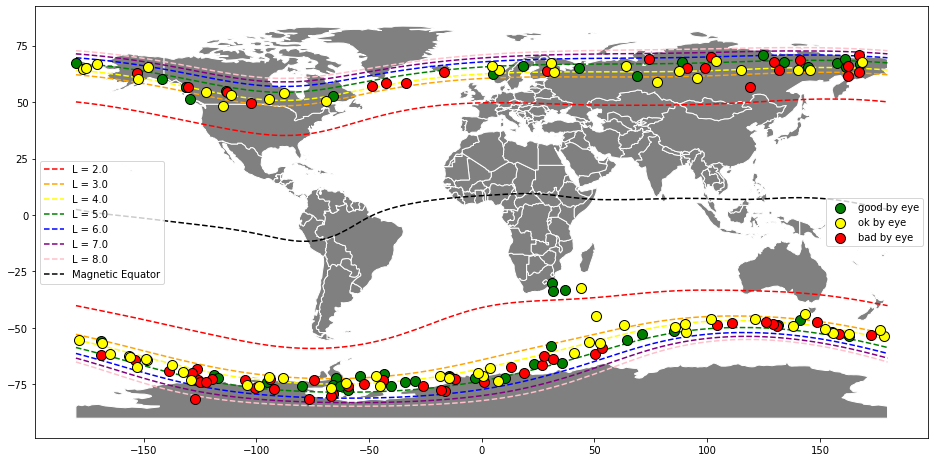

In [69]:
'''
Geographical location
'''

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

lgrid = pd.read_csv('Lgrid.dat', delimiter='\t', header=None)
data = pd.read_csv("events_runonapr29.csv")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(16, 9))
world.plot(ax=ax, color='gray', edgecolor='white')

def name_line(col_num):
    if col_num < 15:
        nm = "L = " + str(col_num)
    elif col_num == 30:
        nm = "Magnetic Equator"
    return nm

col_list = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "black"]
for i in np.arange(1, 30, 2):
    min_pos = np.argmin(lgrid.iloc[:,i])
    lat = np.concatenate(([lgrid.iloc[min_pos:,i-1], lgrid.iloc[:min_pos,i-1]]))
    lon = np.concatenate(([lgrid.iloc[min_pos:,i], lgrid.iloc[:min_pos,i]]))
    if i < 15:
        col_idx = int((i - 1)/2)
        ln_name = name_line((i+3)/2)
    elif (i >= 15) & (i < 28):
        col_idx = int((i - 15)/2)
        ln_name = None
    else:
        col_idx = len(col_list)-1
        ln_name = "Magnetic Equator"
    ax.plot(lon, lat, '--', color=col_list[col_idx], label=ln_name, zorder=5)
fleg = ax.legend(loc="center left")
ax.add_artist(fleg)


## This would all be necessary if plotting with MLT as colorbar, but that seemed like a lot of 
## information that is maybe too much

# # Create a normal and reversed colormap
# plasma = plt.cm.get_cmap('plasma')
# plasma_r = plasma.reversed()

# # Concatenate the two colormaps to create a symmetric colormap
# colors = np.vstack((plasma(np.linspace(0, 1, 128)),
#                     plasma_r(np.linspace(0, 1, 128))))

# splasma = LinearSegmentedColormap.from_list('symmetric_plasma', colors)
# print(splasma)

# good_byeye = np.where(data.eye == 1)[0]
# bad_byeye = np.where(data.eye == 0)[0]
# ok_byeye = np.where(data.eye == 2)[0]

# events = ax.scatter(data.lon[good_byeye], data.lat[good_byeye], s=100, c=data.MLT[good_byeye],
#                      marker='^', label='good by eye', cmap=splasma, zorder=50, vmin=0, vmax=24)
# eventsb = ax.scatter(data.lon[bad_byeye], data.lat[bad_byeye], s=100, c=data.MLT[bad_byeye], 
#                      marker='X', label='bad by eye', cmap=splasma, zorder = 50, vmin=0, vmax=24)
# eventso = ax.scatter(data.lon[ok_byeye], data.lat[ok_byeye], s=100, c=data.MLT[ok_byeye], 
#                      marker='o', label='ok by eye', cmap=splasma, zorder = 50, vmin=0, vmax=24)
# ax.legend(handles=[events, eventso, eventsb], loc='right')
# cbar = fig.colorbar(events)
# cbar.set_label('MLT', color="white")
# cbar.ax.tick_params(labelcolor="white")
# ax.set_xlabel("Longitude", color="white")
# ax.set_ylabel("Latitude", color="white")
# ax.set_title("Geographic Location of Events", color="white")
# ax.tick_params(labelcolor="white")
# # ax.labelcolor("white")

events = ax.scatter(data.lon[data.eye==1], data.lat[data.eye==1], s=100, c='green',
                      label='good by eye', zorder=50, edgecolor='black')
eventsb = ax.scatter(data.lon[data.eye==0], data.lat[data.eye==0], s=100, c='red',
                      label='bad by eye', zorder=50, edgecolor='black')
eventso = ax.scatter(data.lon[data.eye==2], data.lat[data.eye==2], s=100, c='yellow',
                      label='ok by eye', zorder=50, edgecolor='black')
ax.legend(handles=[events, eventso, eventsb], loc='right')

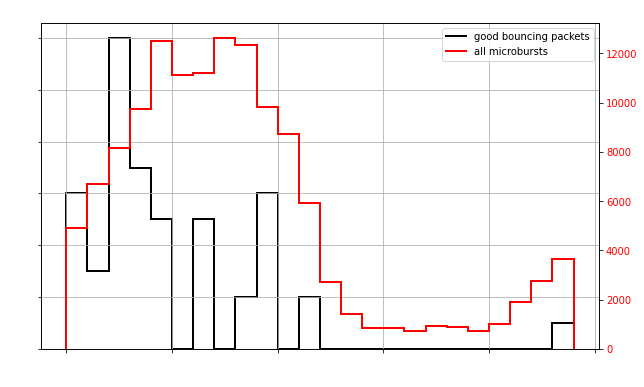

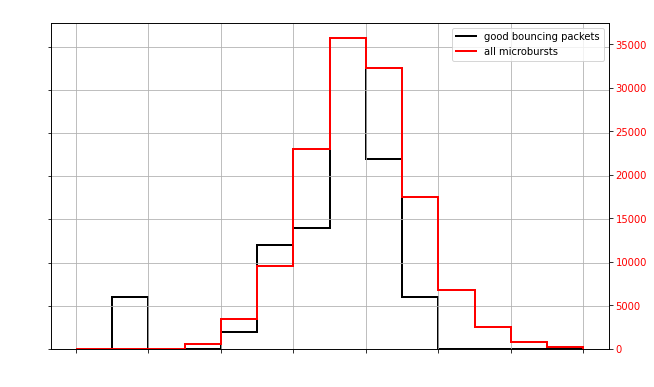

In [63]:
'''
Histograms (swirly eye emoji)
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# plt.figure(figsize = (12, 7))
data = pd.read_csv("events_runonapr29.csv")
ref = pd.read_csv("microburst_catalog_00.txt", sep=",")

# limit reference data to time surveyed by my search script
time_needed = pd.to_datetime(ref['dateTime'])
idx = np.where((time_needed >= datetime(2000, 1, 1)) & (time_needed <= datetime(2003, 12, 31)))[0]
ref = ref.iloc[idx,:]


fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx() 

factor = len(ref)/len(data)
# plt.figure(figsize=(8,5))
counts_all, bins_all = np.histogram(data.MLT, bins=24, range=(0,24))
counts_good, bins_good = np.histogram(data.MLT[data.eye == 1], bins=24, range=(0,24))
counts_ref, bins_ref = np.histogram(ref.MLT, bins=24, range=(0,24))
# abps = ax1.stairs(counts_all, bins_all, label='all bouncing packets', linewidth=2, color="black")
gbps = ax1.stairs(counts_good, bins_good, label='good bouncing packets', linewidth=2, color="black")
am = ax2.stairs(counts_ref, bins_ref, label='all microbursts', linewidth=2, color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax1.set_title('MLT (microburst catalog vs. my bouncing packets)', color="white")
ax1.set_xlabel('MLT', color="white")
ax1.set_ylabel('Counts (#)', color="white")
ax1.grid()
ax1.tick_params(labelcolor="white")


### L-shell
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx() 

factor = len(ref)/len(data)
# plt.figure(figsize=(8,5))
counts_all, bins_all = np.histogram(data.L[data.eye == 1], bins=14, range=(1,8))
counts_ref, bins_ref = np.histogram(ref.L_Shell, bins=14, range=(1,8))
bps = ax1.stairs(counts_all, bins_all, label='good bouncing packets', linewidth=2, color="black")
am = ax2.stairs(counts_ref, bins_ref, label='all microbursts', linewidth=2, color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax1.legend(handles=[bps, am])
ax1.set_title('L-shell (microburst catalog vs. my bouncing packets)', color="white")
ax1.set_xlabel('L-shell', color="white")
ax1.set_ylabel('Counts (#)', color="white")
ax1.grid()
ax1.tick_params(labelcolor="white")


Text(0, 1.5707963267948966, 'MLT')

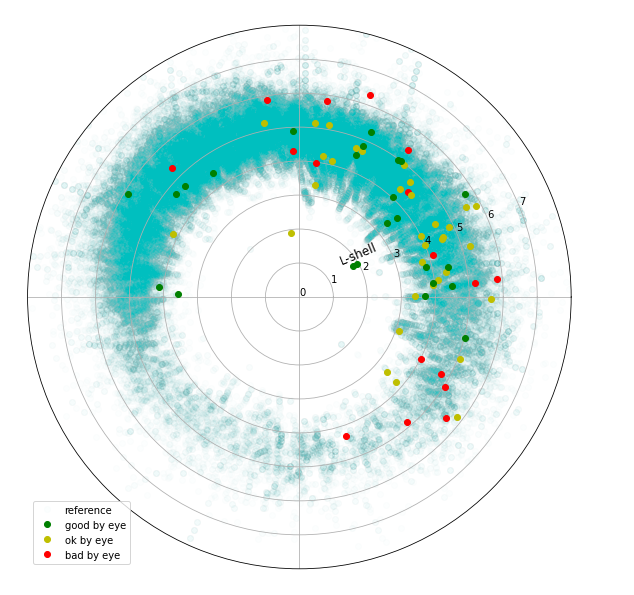

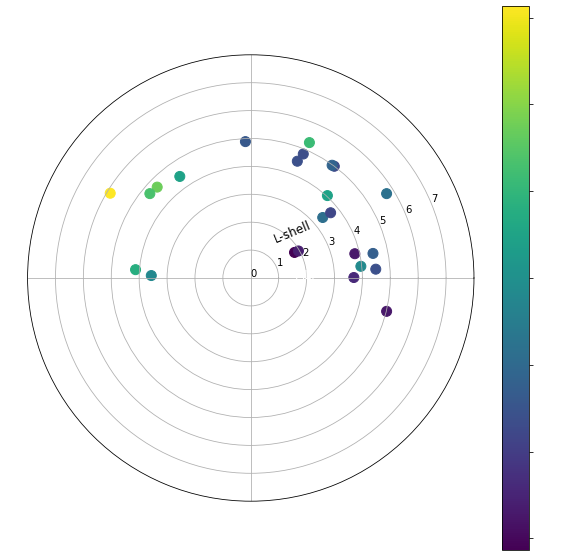

In [98]:
'''
Polar plot of MLT and L-shell
'''

# read in data
data = pd.read_csv("y2000to2002.csv")
ref = pd.read_csv("microburst_catalog_00.txt", sep=",")

# limit reference data to time surveyed by my search script
time_needed = pd.to_datetime(ref['dateTime'])
idx = np.where((time_needed >= datetime(2000, 1, 1)) & (time_needed <= datetime(2003, 12, 31)))[0]
ref = ref.iloc[idx,:]

# Create the plot
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
# Reference microburst data
ax.plot(ref.MLT*np.pi/12, ref.L_Shell, 'co', label='reference', alpha=0.01, zorder=0)
# Plot my events
ax.plot(data.MLT[data.eye==1]*np.pi/12, data.L[data.eye==1], 'go', label='good by eye', zorder=100)
ax.plot(data.MLT[data.eye==2]*np.pi/12, data.L[data.eye==2], 'yo', label='ok by eye', zorder=50)
ax.plot(data.MLT[data.eye==0]*np.pi/12, data.L[data.eye==0], 'ro', label='bad by eye', zorder=25)

# Random formatting stuff
ax.set_rmax(8)
ax.set_rticks(np.arange(0,8))  # L shell values
ticklocs = np.pi*np.arange(0, 360, 90)/180
ax.set_xticks(ticklocs.tolist())
ax.set_xticklabels(['0', '6', '12', '18'],color="white")
ax.set_theta_zero_location("E")
ax.grid(True)
ax.legend()
# labels (weird for polar plots lol)
plt.text(np.pi*2/9, 1.5, 'L-shell', rotation=22.5, size=12)
plt.text(0, 9, 'MLT', color="white", size=12)


# Only good events, and use bounce period as colorbar
fig2, ax2 = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
# Reference microburst data
pp = ax2.scatter(data.MLT[data.eye==1]*np.pi/12, data.L[data.eye==1], s=100, c=data.per[data.eye==1])
cbar = fig2.colorbar(pp)
cbar.set_label('bounce period (s)', color="white")
cbar.ax.tick_params(labelcolor="white")

# Random formatting stuff
ax2.set_rmax(8)
ax2.set_rticks(np.arange(0,8))  # L shell values
ticklocs = np.pi*np.arange(0, 360, 90)/180
ax2.set_xticks(ticklocs.tolist())
ax2.set_xticklabels(['0', '6', '12', '18'],color="white")
ax2.set_theta_zero_location("E")
ax2.grid(True)
ax2.set_title('good ones only',color="white")
plt.text(np.pi/3, 1.5, 'L-shell', rotation=22.5, size=12)
plt.text(0, np.pi/2, 'MLT', color="white", size=12)

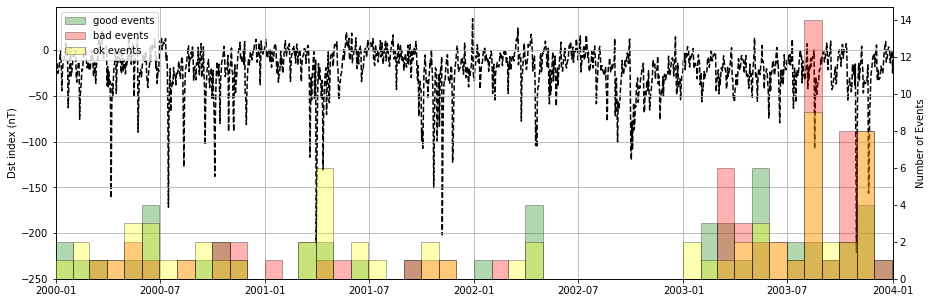

In [45]:
'''
Dst and events
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

data = pd.read_csv("events_runonapr29.csv")
omni = pd.read_csv("OMNI2_H0_MRG1HR_7715.csv", header=72)
t = pd.to_datetime(data.t, format='%Y-%m-%d %H:%M:%S.%f')

dstt = pd.to_datetime(omni.iloc[:,0], format='%Y-%m-%dT%H:%M:%S.%fZ')
dst = omni.iloc[:,1]

omni['TIME'] = pd.to_datetime(omni['TIME'])
omni['DATE'] = omni['TIME'].dt.date
dailydst = omni.groupby('DATE')['DST_nT'].mean()

# Dst time series
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.unique(omni.DATE), dailydst, 'k--', zorder=0)
ax.set_ylabel('Dst index (nT)')
ax.grid()
ax.set_yticks(np.arange(-250, 50, 50))
ax.tick_params(axis='y', labelcolor='black')


# Histograms of events
xmin = datetime(1999, 12, 1)
xmax = datetime(2003, 12, 31)
bin_edges = date_range = pd.date_range(start=xmin, end=xmax, freq='M')
ax2 = ax.twinx()
ax2.hist(t[data.eye==1], bins=bin_edges, label='good events', alpha=0.3, 
         facecolor='green', edgecolor='black', zorder=10)
ax2.hist(t[data.eye==0], bins=bin_edges, range=(xmin, xmax), label='bad events', alpha=0.3, 
         facecolor='red', edgecolor='black', zorder=15)
ax2.hist(t[data.eye==2], bins=bin_edges, range=(xmin, xmax), label='ok events', alpha=0.3, 
         facecolor='yellow', edgecolor='black', zorder=20)
ax2.set_ylabel('Number of Events')
ax2.set_xlim(datetime(2000,1,1), datetime(2004,1,1))
ax2.legend().set_zorder(100)
